## Test Carmen RP curves

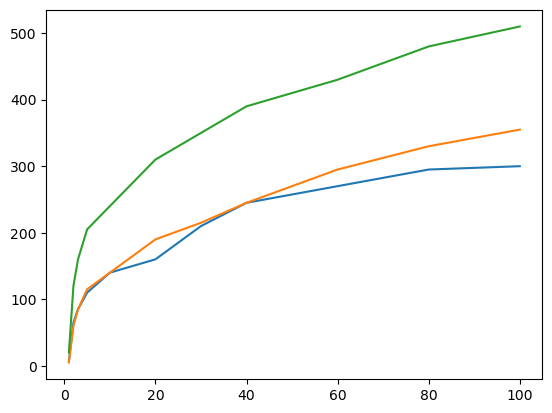

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# rps_carmen = np.geomspace(1, 500, 50)
# exf_carmen = 1/rps_carmen
# values_carmen = 25*np.log(rps_carmen)
rps_carmen = np.array([1, 2, 3, 5, 10, 20, 30, 40, 60, 80, 100])
exf_carmen = 1/rps_carmen
# values_carmen = 25*np.log(rps_carmen)
values_carmen_TC = np.array([5, 60, 85, 115, 140, 190, 215, 245, 295, 330, 355])
values_carmen_RF = np.array([7, 65, 85, 110, 140, 160, 210, 245, 270, 295, 300])
values_carmen_combined = np.array([20, 120, 160, 205, 240, 310, 350, 390, 430, 480, 510])
plt.plot(rps_carmen, values_carmen_RF)
plt.plot(rps_carmen, values_carmen_TC)
plt.plot(rps_carmen, values_carmen_combined)



In [2]:
from return_period_maps import ReturnPeriodMap, ExceedanceCurve
from exceedance_curves import ExceedanceCurve, combine_exceedance_curves

exceedance_curves_carmen = [ExceedanceCurve(
    values=vals,
    exceedance_frequencies=exf_carmen,
) for vals in [values_carmen_RF, values_carmen_TC]] # left plot
# ) for fac in [25, 70]] # right plot

In [3]:
agg_curve_carmen = combine_exceedance_curves(
    exceedance_curves_carmen,
    value_resolution=5.,
    aggregation_method=sum,
    coincidence_fraction=1,
    use_sampling=False)

In [22]:
agg_curve_carmen_sampled = [combine_exceedance_curves(
    exceedance_curves_carmen,
    value_resolution=1.,
    aggregation_method=sum,
    coincidence_fraction=1,
    correlation_factor=cor_fac,
    n_samples=10000)
    for cor_fac in [0., -.9, 1.]]

(-20.0, 700.0)

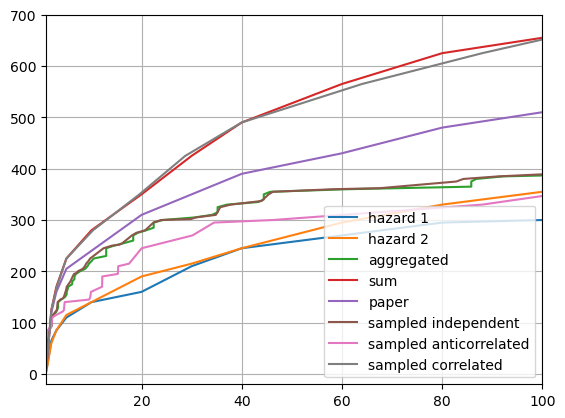

In [24]:


fig, ax = plt.subplots()
for i in [0,1]:
    ax.plot(1/exceedance_curves_carmen[i].exceedance_frequencies, exceedance_curves_carmen[i].values, label=f'hazard {i+1}')


ax.plot(1/agg_curve_carmen.exceedance_frequencies, agg_curve_carmen.values, label='aggregated')
ax.plot(1/exceedance_curves_carmen[0].exceedance_frequencies, np.sum([exceedance_curves_carmen[i].values for i in [0,1]], axis=0), label='sum')
ax.plot(1/exceedance_curves_carmen[0].exceedance_frequencies, values_carmen_combined, label='paper')
ax.plot(1/agg_curve_carmen_sampled[0].exceedance_frequencies, agg_curve_carmen_sampled[0].values, label='sampled independent')
ax.plot(1/agg_curve_carmen_sampled[1].exceedance_frequencies, agg_curve_carmen_sampled[1].values, label='sampled anticorrelated')
ax.plot(1/agg_curve_carmen_sampled[2].exceedance_frequencies, agg_curve_carmen_sampled[2].values, label='sampled correlated')


ax.grid()
ax.legend()
ax.set_xlim(1, 100)
ax.set_ylim(-20, 700)